In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

* Affectation de X et de Y

In [2]:
x = data.columns

In [3]:
Y = data["quality"]
X = data[x[:-1]]
print (X.shape)
print (Y.shape)
X



(1599, 11)
(1599,)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

## _Décomposition de la Target en variables binaires_

In [4]:
good_wine = np.where (Y >= 6, 1, 0)
bad_wine = np.where (Y < 6, 0, 1)
bad_wine

array([0, 0, 0, ..., 1, 0, 1])

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split (X, good_wine, test_size = 0.33)

In [6]:
classer = svm.SVC (kernel = 'rbf', gamma = 0.03)
classer.fit (X_train, Y_train)

SVC(gamma=0.03)

## _Prédiction sur mon jeu de test_

Avant nous allons centrer et réduire nos variables explicatives par rapport à leur moyenne pour qu'elle tendent beaucoup plus à leur valeurs réelles ou si situer sur la même échelle.

.

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Maintenant que nos données sont centrées et réduites on peut passer à la prédiction

,

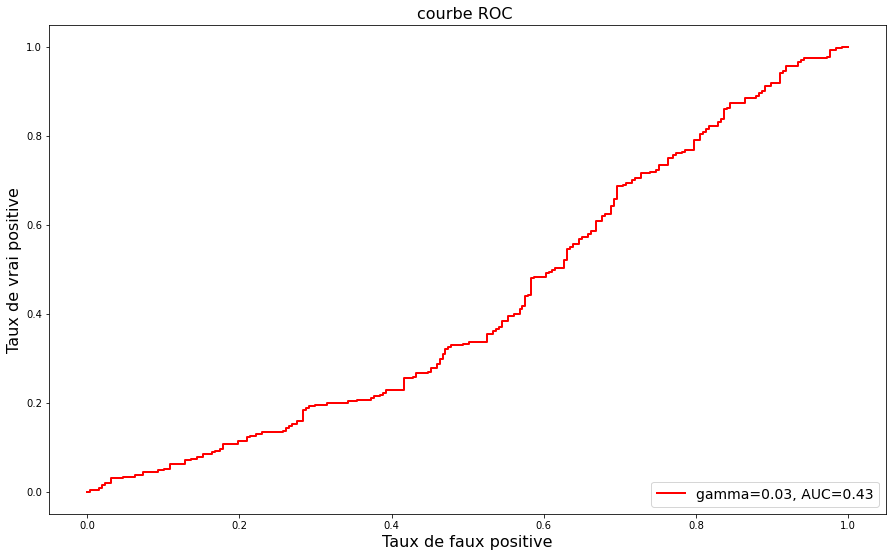

In [8]:
Y_test_pred = classer.decision_function(X_test)
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

#  aire en dessous de la courbe
auc = metrics.auc(fpr, tpr)

# afficher la courbe ROC
fig = plt.figure(figsize=(15, 9))
plt.plot(fpr, tpr, '-', lw=2, color = 'red', label='gamma=0.03, AUC=%.2f' % auc)
plt.xlabel('Taux de faux positive', fontsize=16)
plt.ylabel('Taux de vrai positive', fontsize=16)
plt.title('courbe ROC ', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

la surface de l'aire obtenu est relativement faible donc pas assez important. Ceci implique que le taux de gamma n'est peut être pas celui qui permet d'obtenir la représentation parfaite de notre jeu.

Pour ce faire nous allons procéder à une validation croisée des paramètres afin d'en prendre celui qui est le plus approprié pour notre jeu.

  ,

## _Selection des paramètres_

In [9]:
parametres = [{'C': [1, 10, 100, 500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classer,
                           param_grid = parametres,
                           scoring = 'accuracy',
                           cv = 10,
                          )
grid_search = grid_search.fit(X_train, Y_train)

In [10]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print (best_accuracy)
print (best_parameters)

0.7898667358947733
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


## _Optimisation du modèle_

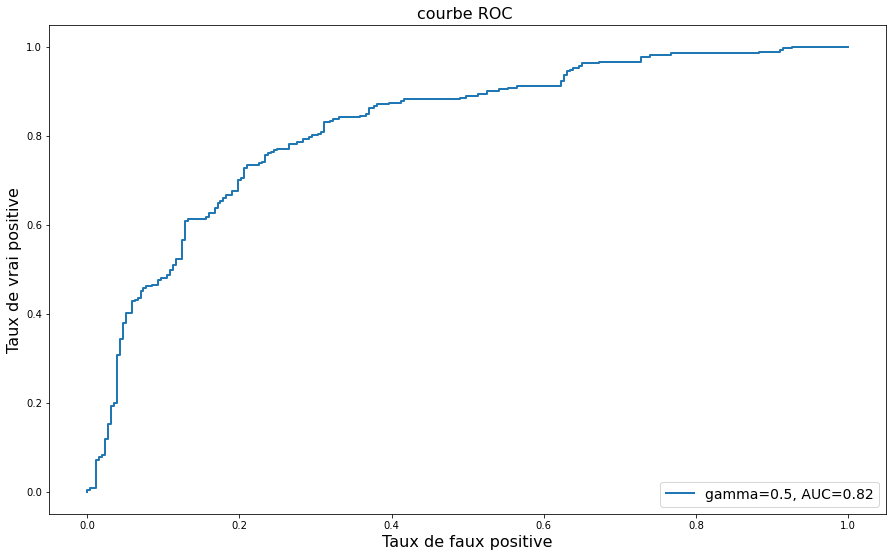

In [11]:
classer_1 = svm.SVC (kernel = 'rbf', gamma = 0.5, C = 1)
classer_1.fit (X_train, Y_train)

Y_test_pred_1 = classer_1.decision_function(X_test)
fpr_1, tpr_1, thr_1 = metrics.roc_curve(Y_test, Y_test_pred_1)

#  aire en dessous de la courbe
auc_1 = metrics.auc(fpr_1, tpr_1)

# afficher la courbe ROC
fig = plt.figure(figsize=(15, 9))
plt.plot(fpr_1, tpr_1, '-', lw=2, label='gamma=0.5, AUC=%.2f' % auc_1)
plt.xlabel('Taux de faux positive', fontsize=16)
plt.ylabel('Taux de vrai positive', fontsize=16)
plt.title('courbe ROC ', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

On va superposer les deux graphiques pour bien voir la différence    



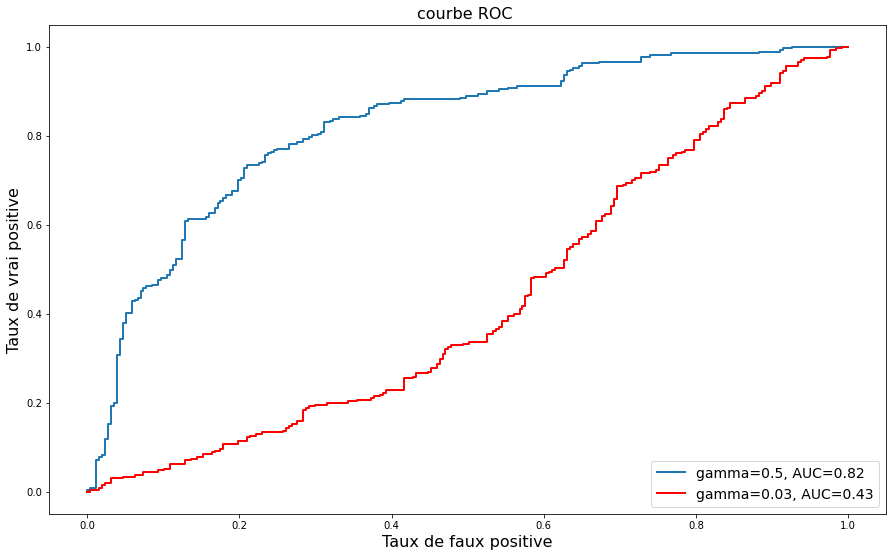

In [12]:
fig = plt.figure(figsize=(15, 9))
plt.plot(fpr_1, tpr_1, '-', lw=2, label='gamma=0.5, AUC=%.2f' % auc_1)
plt.plot(fpr, tpr, '-', lw=2, color = "red", label='gamma=0.03, AUC=%.2f' % auc)
plt.xlabel('Taux de faux positive', fontsize=16)
plt.ylabel('Taux de vrai positive', fontsize=16)
plt.title('courbe ROC ', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()




On remarque bien qu'avec un taux de gamma égale à 60% on constate nettement une amélioration de la représentation. L'aire en dessous de la courbe bleue est égale à 0.84 .

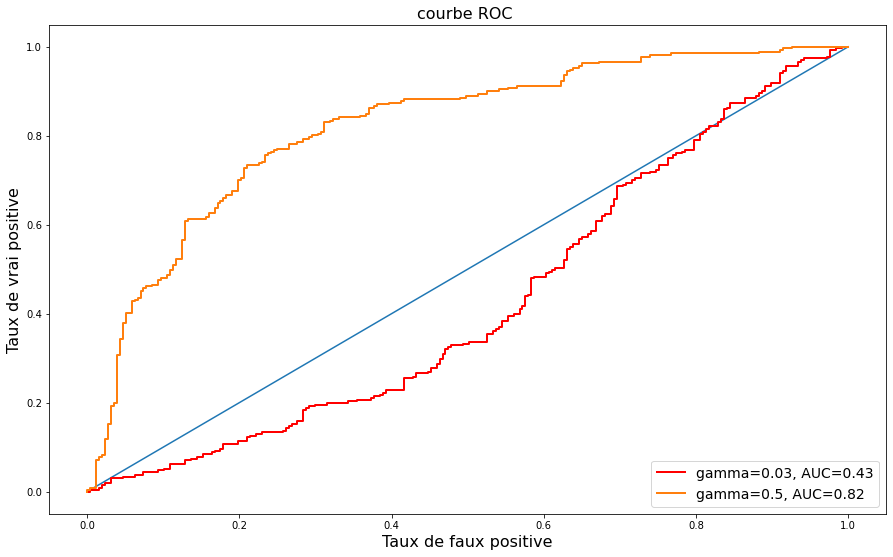

In [15]:
fig = plt.figure(figsize=(15, 9))
plt.plot(good_wine, bad_wine)
plt.plot(fpr, tpr, '-', lw=2, color = "red", label='gamma=0.03, AUC=%.2f' % auc)
plt.plot(fpr_1, tpr_1, '-', lw=2, label='gamma=0.5, AUC=%.2f' % auc_1)
plt.xlabel('Taux de faux positive', fontsize=16)
plt.ylabel('Taux de vrai positive', fontsize=16)
plt.title('courbe ROC ', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()